### Load the Iris dataset

The Iris dataset consists of 50 samples for each of three species of Iris flower (Iris setosa, Iris virginica and Iris versicolor). Four features were measured for each sample: the length and the width of the sepals and petals, measured in centimetres.

The pictures of the three species are shown below:

| [![Iris Setosa](https://upload.wikimedia.org/wikipedia/commons/5/56/Kosaciec_szczecinkowaty_Iris_setosa.jpg)](https://en.wikipedia.org/wiki/Iris_setosa)  | [![Iris Virginica](https://upload.wikimedia.org/wikipedia/commons/thumb/9/9f/Iris_virginica.jpg/1920px-Iris_virginica.jpg)](https://en.wikipedia.org/wiki/Iris_virginica) | [![Iris Versicolor](https://upload.wikimedia.org/wikipedia/commons/2/27/Blue_Flag%2C_Ottawa.jpg)](https://en.wikipedia.org/wiki/Iris_versicolor) |
|:---:|:---:|:---:|
| Iris Setosa| Iris Virginica| Iris Versicolor|

In [2]:
import numpy as np
import pandas as pd
import itertools
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.metrics import classification_report,confusion_matrix


plt.style.use('seaborn-poster')
%matplotlib inline

## load the dataset

In [3]:
Iris = datasets.load_iris()

In [5]:
Iris


{'DESCR': 'Iris Plants Database\n====================\n\nNotes\n-----\nData Set Characteristics:\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)\n    ============== ==== ==== ======= ===== ==

In [6]:
print(Iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [15]:
feature_name = Iris.feature_names

In [7]:
print(Iris.data)

[[ 5.1  3.5  1.4  0.2]
 [ 4.9  3.   1.4  0.2]
 [ 4.7  3.2  1.3  0.2]
 [ 4.6  3.1  1.5  0.2]
 [ 5.   3.6  1.4  0.2]
 [ 5.4  3.9  1.7  0.4]
 [ 4.6  3.4  1.4  0.3]
 [ 5.   3.4  1.5  0.2]
 [ 4.4  2.9  1.4  0.2]
 [ 4.9  3.1  1.5  0.1]
 [ 5.4  3.7  1.5  0.2]
 [ 4.8  3.4  1.6  0.2]
 [ 4.8  3.   1.4  0.1]
 [ 4.3  3.   1.1  0.1]
 [ 5.8  4.   1.2  0.2]
 [ 5.7  4.4  1.5  0.4]
 [ 5.4  3.9  1.3  0.4]
 [ 5.1  3.5  1.4  0.3]
 [ 5.7  3.8  1.7  0.3]
 [ 5.1  3.8  1.5  0.3]
 [ 5.4  3.4  1.7  0.2]
 [ 5.1  3.7  1.5  0.4]
 [ 4.6  3.6  1.   0.2]
 [ 5.1  3.3  1.7  0.5]
 [ 4.8  3.4  1.9  0.2]
 [ 5.   3.   1.6  0.2]
 [ 5.   3.4  1.6  0.4]
 [ 5.2  3.5  1.5  0.2]
 [ 5.2  3.4  1.4  0.2]
 [ 4.7  3.2  1.6  0.2]
 [ 4.8  3.1  1.6  0.2]
 [ 5.4  3.4  1.5  0.4]
 [ 5.2  4.1  1.5  0.1]
 [ 5.5  4.2  1.4  0.2]
 [ 4.9  3.1  1.5  0.1]
 [ 5.   3.2  1.2  0.2]
 [ 5.5  3.5  1.3  0.2]
 [ 4.9  3.1  1.5  0.1]
 [ 4.4  3.   1.3  0.2]
 [ 5.1  3.4  1.5  0.2]
 [ 5.   3.5  1.3  0.3]
 [ 4.5  2.3  1.3  0.3]
 [ 4.4  3.2  1.3  0.2]
 [ 5.   3.5

In [8]:
print(Iris.target_names)

['setosa' 'versicolor' 'virginica']


In [17]:
target_name = Iris.target_names

In [9]:
print(Iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [18]:
target = Iris.target

In [19]:
target_class = set(target)

In [20]:
target_class

{0, 1, 2}

In [10]:
print(set(Iris.target))

{0, 1, 2}


In [21]:
print('We have %d classes in the dataset' % len(target_class))

We have 3 classes in the dataset


In [11]:
print(Iris.data.shape)

(150, 4)


In [12]:
shape = Iris.data.shape

In [13]:
print('We have %d data samples with %d features'%(shape[0], shape[1]))

We have 150 data samples with 4 features


In [14]:
# select two featurs: sepal and petal lengths 
Iris.data[:, [0, 2]]

array([[ 5.1,  1.4],
       [ 4.9,  1.4],
       [ 4.7,  1.3],
       [ 4.6,  1.5],
       [ 5. ,  1.4],
       [ 5.4,  1.7],
       [ 4.6,  1.4],
       [ 5. ,  1.5],
       [ 4.4,  1.4],
       [ 4.9,  1.5],
       [ 5.4,  1.5],
       [ 4.8,  1.6],
       [ 4.8,  1.4],
       [ 4.3,  1.1],
       [ 5.8,  1.2],
       [ 5.7,  1.5],
       [ 5.4,  1.3],
       [ 5.1,  1.4],
       [ 5.7,  1.7],
       [ 5.1,  1.5],
       [ 5.4,  1.7],
       [ 5.1,  1.5],
       [ 4.6,  1. ],
       [ 5.1,  1.7],
       [ 4.8,  1.9],
       [ 5. ,  1.6],
       [ 5. ,  1.6],
       [ 5.2,  1.5],
       [ 5.2,  1.4],
       [ 4.7,  1.6],
       [ 4.8,  1.6],
       [ 5.4,  1.5],
       [ 5.2,  1.5],
       [ 5.5,  1.4],
       [ 4.9,  1.5],
       [ 5. ,  1.2],
       [ 5.5,  1.3],
       [ 4.9,  1.5],
       [ 4.4,  1.3],
       [ 5.1,  1.5],
       [ 5. ,  1.3],
       [ 4.5,  1.3],
       [ 4.4,  1.3],
       [ 5. ,  1.6],
       [ 5.1,  1.9],
       [ 4.8,  1.4],
       [ 5.1,  1.6],
       [ 4.6,

In [30]:
selected_array = Iris.data[:, [0, 2]]

In [27]:
zipped_data = zip(range(len(target_class)), ['b', 'g', 'r'], ['o', '^', '*'])

In [28]:
zipped_data

In [29]:
print(zipped_data)

In [32]:
selected_array[:, 0][0]

array([ 5.1,  4.9,  4.7,  4.6,  5. ,  5.4,  4.6,  5. ,  4.4,  4.9,  5.4,
        4.8,  4.8,  4.3,  5.8,  5.7,  5.4,  5.1,  5.7,  5.1,  5.4,  5.1,
        4.6,  5.1,  4.8,  5. ,  5. ,  5.2,  5.2,  4.7,  4.8,  5.4,  5.2,
        5.5,  4.9,  5. ,  5.5,  4.9,  4.4,  5.1,  5. ,  4.5,  4.4,  5. ,
        5.1,  4.8,  5.1,  4.6,  5.3,  5. ,  7. ,  6.4,  6.9,  5.5,  6.5,
        5.7,  6.3,  4.9,  6.6,  5.2,  5. ,  5.9,  6. ,  6.1,  5.6,  6.7,
        5.6,  5.8,  6.2,  5.6,  5.9,  6.1,  6.3,  6.1,  6.4,  6.6,  6.8,
        6.7,  6. ,  5.7,  5.5,  5.5,  5.8,  6. ,  5.4,  6. ,  6.7,  6.3,
        5.6,  5.5,  5.5,  6.1,  5.8,  5. ,  5.6,  5.7,  5.7,  6.2,  5.1,
        5.7,  6.3,  5.8,  7.1,  6.3,  6.5,  7.6,  4.9,  7.3,  6.7,  7.2,
        6.5,  6.4,  6.8,  5.7,  5.8,  6.4,  6.5,  7.7,  7.7,  6. ,  6.9,
        5.6,  7.7,  6.3,  6.7,  7.2,  6.2,  6.1,  6.4,  7.2,  7.4,  7.9,
        6.4,  6.3,  6.1,  7.7,  6.3,  6.4,  6. ,  6.9,  6.7,  6.9,  5.8,
        6.8,  6.7,  6.7,  6.3,  6.5,  6.2,  5.9])

## do some visualization of the dataset

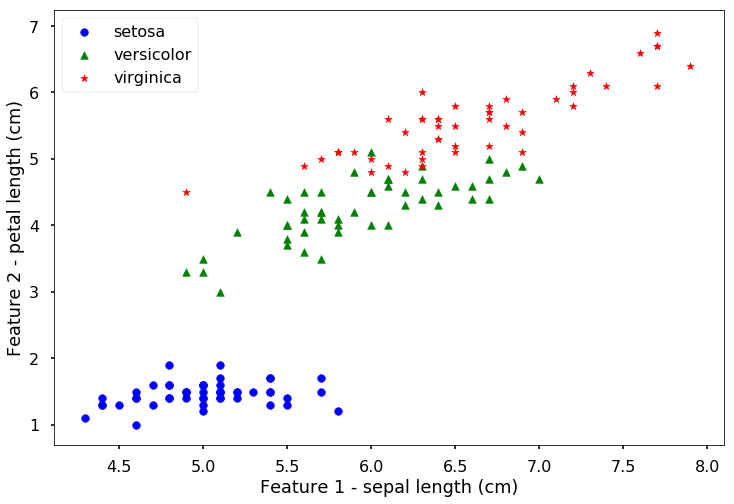

In [36]:
plt.figure(figsize = (12,8))
for i, color, symbol in (zip(range(len(target_class)), ['b', 'g', 'r'], ['o', '^', '*'])):
    ix = target == i
    plt.scatter(selected_array[:, 0][ix], selected_array[:, 1][ix], color = color, marker = symbol, s = 60, 
                label = target_name[i])

plt.legend(loc = 2, scatterpoints = 1)
plt.xlabel('Feature 1 - ' + feature_name[0])
plt.ylabel('Feature 2 - ' + feature_name[2])
plt.show()

## Train a SVM 
support vector machine (SVM): an SVM is a discriminative classifier formally defined by a separating hyperplane. In other words, given labeled training data (supervised learning), the algorithm outputs an optimal hyperplane which categorizes new examples.

In [37]:
# Initialize SVM classifier
classifier = svm.SVC(kernel='linear')

# Train the classifier with data
classifier.fit(selected_array,target)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

## The training results

In [38]:
classifier.predict(selected_array)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

Check the performance on the training data. We will plot the confusion matrix. Also, we will plot the decision boundary, which will help us understand more of the capability of the classifier (since we only have two selected features, this makes it eaiser to view the decision boundary).

In [39]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting 'normalize=True'.
    """
    fig = plt.figure(figsize=(12, 8)) 
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

In [40]:
# Plotting decision boundary helper functions

def plot_decision_boundary(X, y, classifier, title = None):
    '''
    Helper function to plot the decision boundary for the SVM
    '''
    
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.figure(figsize = (10, 8))
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8)
    
    if title is not None:
        plt.title(title)
    
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

In [41]:
predicted = classifier.predict(selected_array)

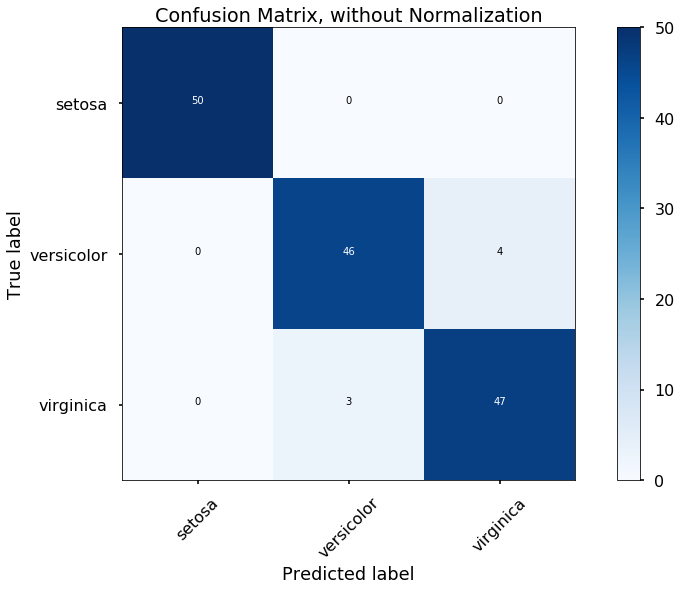

In [42]:
# plot the confusion matrix
cm = confusion_matrix(target,predicted)
plot_confusion_matrix(cm, classes=Iris.target_names, title='Confusion Matrix, without Normalization')

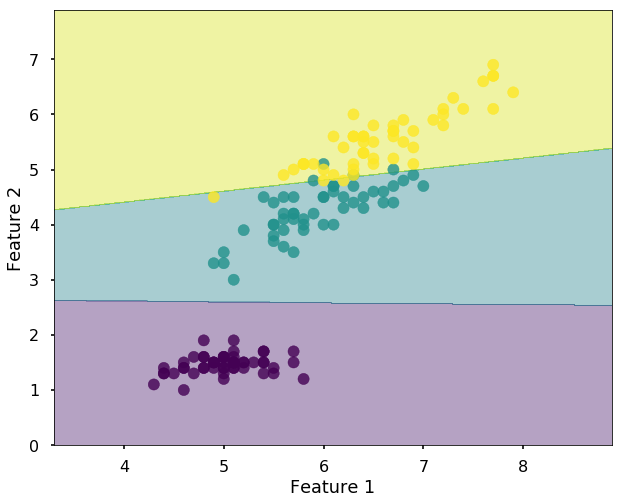

In [43]:
plot_decision_boundary(selected_array, target, classifier)

For the Iris dataset, we can also use unsupervised methods to determine combinations of the measurements which best display the structure of the data.

### Dimensionality reduction with PCA
Principal Component Analysis (PCA) is a dimension reduction technique that can find the combinations of variables that explain the most variance. Consider the Iris dataset. It cannot be visualized in a 2D plot, as it has 4 features. We are going to extract 2 combinations of sepal and petal dimensions to visualize it:

In [45]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(Iris.data)
X_reduced = pca.transform(Iris.data)
print("Reduced dataset shape:", X_reduced.shape)

Reduced dataset shape: (150, 2)


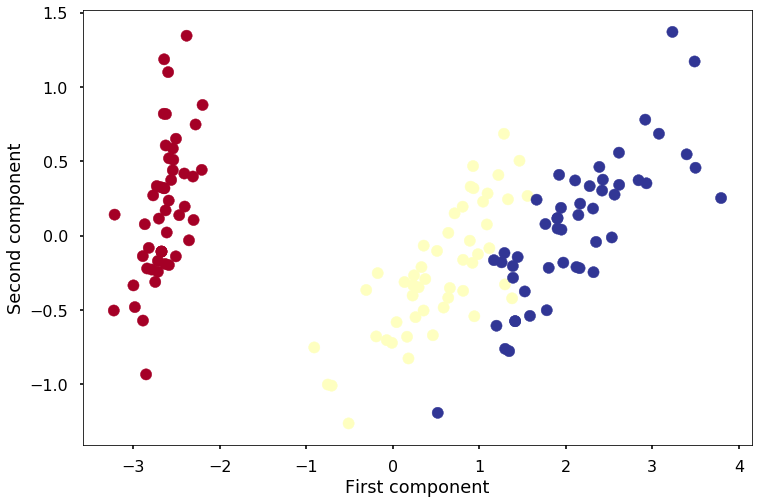

In [46]:
plt.figure(figsize=(12,8))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=Iris.target, cmap='RdYlBu')
plt.xlabel('First component')
plt.ylabel('Second component')

## Clustering with K-means
K-Means is an algorithm for unsupervised clustering: that is, finding clusters in data based on the data attributes alone (not the labels). K-Means is a relatively easy-to-understand algorithm. It searches for cluster centers which are the means of the points within the cluster, such that every point is closest to the cluster center it is assigned to.

In [47]:
from sklearn.cluster import KMeans

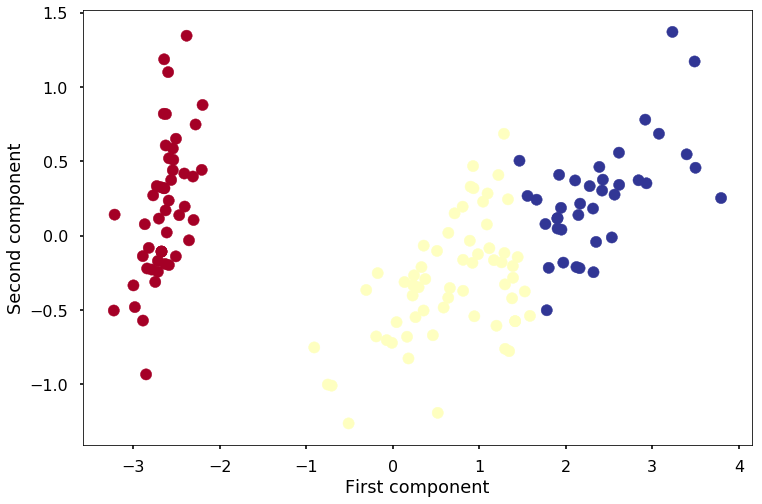

In [48]:
K_means = KMeans(n_clusters=3, random_state=2)
K_means.fit(Iris.data)
X_reduced = pca.transform(Iris.data)
y_pred = K_means.predict(Iris.data)

plt.figure(figsize=(12,8))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_pred, cmap='RdYlBu')
plt.xlabel('First component')
plt.ylabel('Second component')

### Classification

In [49]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing

In [50]:
# Split the dataset into a training and a testing set
# Test set will be the 20% taken randomly
X_train, X_test, y_train, y_test = train_test_split(Iris.data, Iris.target,
 test_size=0.20, random_state=33)
print(X_train.shape, y_train.shape)

(120, 4) (120,)


In [51]:
# Standardize the features
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [52]:
classifier = svm.SVC()
classifier.fit(X_train, y_train)

classifier.score(X_test, y_test)

0.96666666666666667

### Pipeline
We can use pipeline to chain all the operations into a simple pipeline

Sequentially apply a list of transforms and a final estimator. Intermediate steps of the pipeline must be ‘transforms’, that is, they must implement fit and transform methods. The final estimator only needs to implement fit. The purpose of the pipeline is to assemble several steps that can be cross-validated together while setting different parameters. For this, it enables setting parameters of the various steps using their names and the parameter name separated by a ‘__’. A step’s estimator may be replaced entirely by setting the parameter with its name to another estimator, or a transformer removed by setting to None.

In [54]:
from sklearn.pipeline import Pipeline

estimators = []
estimators.append(('standardize', preprocessing.StandardScaler()))
estimators.append(('svm', svm.SVC()))
pipe = Pipeline(estimators)

pipe.fit(X_train, y_train)

pipe.score(X_test, y_test)

0.96666666666666667

## Cross Validation

When evaluating different settings (“hyperparameters”) for estimators, such as the C setting that must be manually set for an SVM, there is still a risk of overfitting on the test set because the parameters can be tweaked until the estimator performs optimally. This way, knowledge about the test set can “leak” into the model and evaluation metrics no longer report on generalization performance. To solve this problem, yet another part of the dataset can be held out as a so-called “validation set”: training proceeds on the training set, after which evaluation is done on the validation set, and when the experiment seems to be successful, final evaluation can be done on the test set. However, by partitioning the available data into three sets, we drastically reduce the number of samples which can be used for learning the model, and the results can depend on a particular random choice for the pair of (train, validation) sets. A solution to this problem is a procedure called cross-validation (CV for short). A test set should still be held out for final evaluation, but the validation set is no longer needed when doing CV. In the basic approach, called k-fold CV, the training set is split into k smaller sets (other approaches are described below, but generally follow the same principles). The following procedure is followed for each of the k “folds”: A model is trained using k-1 of the folds as training data; the resulting model is validated on the remaining part of the data (i.e., it is used as a test set to compute a performance measure such as accuracy). The performance measure reported by k-fold cross-validation is then the average of the values computed in the loop. This approach can be computationally expensive, but does not waste too much data (as it is the case when fixing an arbitrary test set), which is a major advantage in problem such as inverse inference where the number of samples is very small.

In [55]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(pipe, Iris.data, Iris.target, cv=10)
print(scores) 

[ 1.          0.93333333  1.          0.93333333  1.          0.93333333
  0.86666667  1.          1.          1.        ]


In [56]:
scores = cross_val_score(pipe, Iris.data, Iris.target, cv=5)
print(scores)

[ 0.96666667  0.96666667  0.96666667  0.93333333  1.        ]


In [57]:
print("Accuracy: %0.3f (+/- %0.3f)" % (scores.mean(), scores.std()))

Accuracy: 0.967 (+/- 0.021)


In [58]:
from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(n_splits=3, test_size=0.3, random_state=0)
print(cross_val_score(pipe, Iris.data, Iris.target, cv=cv))

[ 0.97777778  0.93333333  0.95555556]
